# house prices prediction
---
a comparation and analysis with 2 models
* Simple Linear Regression with **SciKit Learn**
    * assumes linear relationship between the features and the target
    * can only fit a straight line or a hyperplane
* Neural Network with **TensorFlow**
    * can fit any complex relationship between the features and the target
    * uses backpropagation with gradient descent to minimize the loss function
    * much more computationally expensive

## goals:
* showing the difference between **linear regression** and **neural networks**
* learning how to use TensorFlow to build a neural network


## Steps
1. Load the data
2. Preprocess the data
3. Train the models
4. Evaluate the models
5. Graph the results

## Data inspection

In [55]:
# simple data inspection with pandas
import pandas as pd
from IPython.display import Markdown, display # for pretty-printing markdown - to be used for later

df = pd.read_csv('housing.csv')

# first few rows
print(df.head())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


C:\Users\Piotr\AppData\Local\Temp\ipykernel_27052\1219321033.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([f'${int(tick):,}' for tick in ticks if tick >= 0])


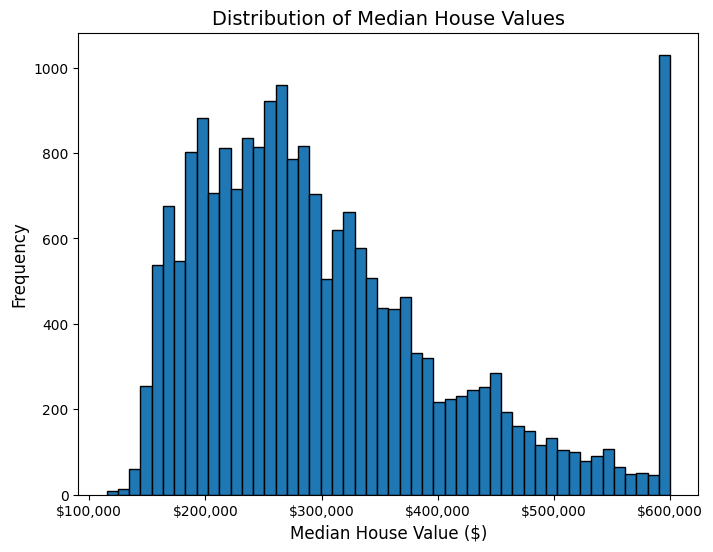

In [56]:
import matplotlib.pyplot as plt

# Assuming your dataset is already loaded as 'df'
# Plot the distribution of house prices (median_house_value)
plt.figure(figsize=(8, 6))

# Create the histogram
plt.hist(df['median_house_value'], bins=50, edgecolor='k')

# Title and labels with better formatting
plt.title('Distribution of Median House Values', fontsize=14)
plt.xlabel('Median House Value ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Format x-axis ticks to display dollar signs and commas
ticks = plt.gca().get_xticks()
plt.gca().set_xticklabels([f'${int(tick):,}' for tick in ticks if tick >= 0])

# Display the plot
plt.show()


## Preprocessing

In [46]:
# preprocessing with sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# y = target: median_house_value
# x = features: all columns except the target
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

# categorical and numerical columns
# categorical   e.g. NEAR BAY, INLAND, etc.
# numerical     e.g. longitude, latitude, housing_median_age, etc.
cat_columns = ["ocean_proximity"]
num_columns = X.columns.difference(cat_columns)



# pipelines - applying sequenctial transformations to the data

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), # fill NaN or None values with the median of the column
    ('scaler', StandardScaler())  # standardize the data - make mean=0, std=1 to improve the performance
])

cat_pipeline = Pipeline([
    ('encoder', OneHotEncoder())  # convert categorical data into one-hot vectors. e.g. NEAR BAY -> [1, 0, 0, 0]
])



# add pipelines into a ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_columns),
    ('cat', cat_pipeline, cat_columns)
])

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# apply preprocessing to the training and test sets
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


## Models training

### Simple Linear Regression model with Scikit Learn

In [72]:
# model training and evaluation - SciKit Learn with Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import time

# model training
# time the training
t0 = time.time()
model = LinearRegression()
model.fit(X_train, y_train)
t1 = time.time()

y_pred = model.predict(X_test)

# evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
display(Markdown("### **SciKit Learn** with Linear Regression results:"))
display(Markdown(f"&emsp;&emsp;&emsp;Root Mean Squared Error: **{rmse}**"))
display(Markdown(f"* Training time: **{t1-t0:.5f}** seconds"))


### **SciKit Learn** with Linear Regression results:

&emsp;&emsp;&emsp;Root Mean Squared Error: **70059.19333925012**

&emsp;&emsp;&emsp;Training time: **0.00000** seconds

### More advanced model with TensorFlow Neural Network

In [73]:
# model training and evaluation - TensorFlow with Neural Networks
# tensorflow is considered more sophisticated than SciKit Learn for neural networks

# multi-layered Deep Learning model

import tensorflow as tf
import time
# model definition
# 2 hidden layers with 64 neurons each with ReLU activation function
# loss function - mean squared error
# dense - all neurons are connected with every neuron in the previous layer
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # output layer
])

# Compile the model
nn_model.compile(optimizer='adam', loss='mse')

# model training
t0_nn = time.time()
nn_model.fit(X_train, y_train, epochs=20, validation_split=0.2)
t1_nn = time.time()

# evaluation
nn_mse = nn_model.evaluate(X_test, y_test)
y_pred_nn = nn_model.predict(X_test)
display(Markdown("### **TensorFlow** with Neural Networks results:"))
display(Markdown(f"* Root Mean Squared Error: **{np.sqrt(nn_mse)}**"))
display(Markdown(f"* Training time: **{t1_nn-t0_nn:.5f}** seconds"))

print("exqample predicted test values:")
print(y_pred_nn[:5])


c:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 56758657024.0000 - val_loss: 55831060480.0000
Epoch 2/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 54741860352.0000 - val_loss: 48901918720.0000
Epoch 3/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 45204676608.0000 - val_loss: 35217952768.0000
Epoch 4/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 30952421376.0000 - val_loss: 20828366848.0000
Epoch 5/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 17666725888.0000 - val_loss: 12117268480.0000
Epoch 6/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10905534464.0000 - val_loss: 8954504192.0000
Epoch 7/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8288979456.0000 - val_loss: 7750618624.0000
Epoch 8/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7353717760.0000 - val_loss: 7056303616.0000
Epoch 9/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6826119680.0000 - val_loss: 6559764480.0000
Epoch 10/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step 

### **TensorFlow** with Neural Networks results:

&emsp;&emsp;&emsp;Root Mean Squared Error: **69754.41812530586**

&emsp;&emsp;&emsp;Training time: **20.11055** seconds

exqample predicted test values:
[[ 43025.52]
 [117335.37]
 [277374.2 ]
 [276678.75]
 [263377.25]]


## Evaluation and plotting

### Linear Regression

C:\Users\Piotr\AppData\Local\Temp\ipykernel_27052\2332175913.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'${int(tick):,}' for tick in plt.gca().get_yticks()])


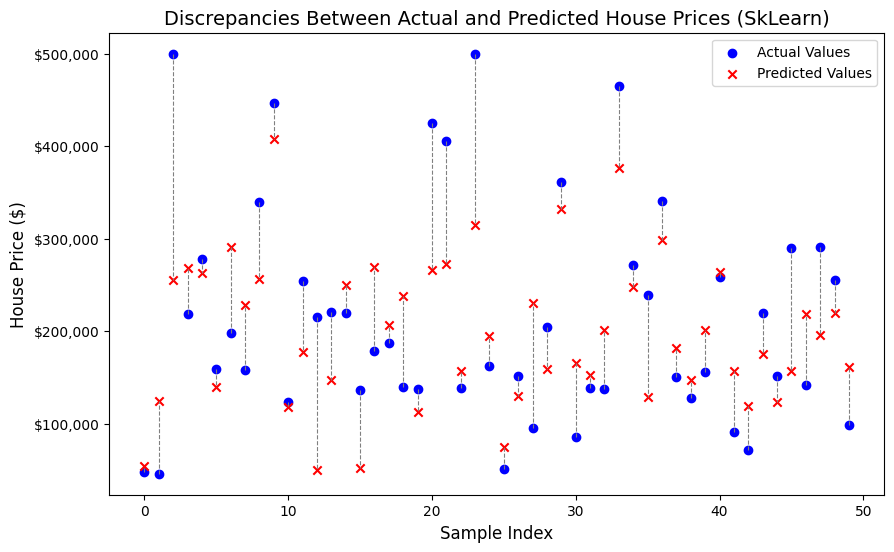

C:\Users\Piotr\AppData\Local\Temp\ipykernel_27052\2332175913.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'${int(tick):,}' for tick in plt.gca().get_yticks()])


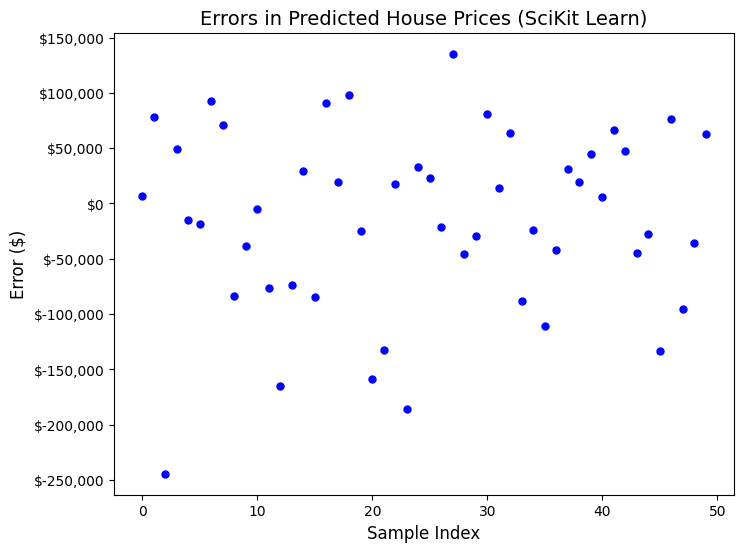

### **SciKit Learn** with Linear Regression: Errors

* Mean Absolute Error: **65272.76794639867**

* Standard Deviation of Errors: **82097.21392926616**

* Max Error: **135392.038561488**

* Mean Error: **-14920.78646978404**

* Variance of Errors: **6739952534.947693**

In [86]:
import matplotlib.pyplot as plt

# choose last n_samples samples of the test_data for plotting
n_samples = 50
y_test_sample = y_test[:n_samples]
y_pred_sample = y_pred[:n_samples] # the predicted values from the SciKit Learn model

# standardization:
#    - making indexes 0,1,2.... and NOT keeping it as a separate column
#    - flatten the array to make it a 1D array
y_test_sample = y_test_sample.reset_index(drop=True)
y_pred_sample = pd.Series(y_pred_sample.flatten()).reset_index(drop=True)

# scatter plot of actual vs predicted house prices
plt.figure(figsize=(10, 6))
plt.scatter(range(n_samples), y_test_sample, color='blue', label='Actual Values')
plt.scatter(range(n_samples), y_pred_sample, color='red', label='Predicted Values', marker='x')

# gray lines connecting the actual and predicted points
for i in range(n_samples):
    plt.plot([i, i], [y_test_sample.iloc[i], y_pred_sample.iloc[i]], 'gray', linestyle='--', linewidth=0.8)

plt.title('Discrepancies Between Actual and Predicted House Prices (SkLearn)', fontsize=14)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('House Price ($)', fontsize=12)

# trick to format y-axis: display dollar signs and commas
plt.gca().set_yticklabels([f'${int(tick):,}' for tick in plt.gca().get_yticks()]) 

plt.legend()

# Display the plot
plt.show()


errors_skl = y_pred_sample - y_test_sample 
# Plot the  errors
plt.figure(figsize=(8, 6))
plt.plot(errors_skl, marker='o', linestyle='None', color='blue', markersize=5)
plt.title('Errors in Predicted House Prices (SciKit Learn)', fontsize=14)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Error ($)', fontsize=12)
plt.gca().set_yticklabels([f'${int(tick):,}' for tick in plt.gca().get_yticks()])
plt.show()

display(Markdown("### **SciKit Learn** with Linear Regression: Errors"))
display(Markdown(f"* Mean Absolute Error: **{errors_skl.abs().mean()}**"))
display(Markdown(f"* Standard Deviation of Errors: **{errors_skl.std()}**"))
display(Markdown(f"* Max Error: **{errors_skl.max()}**"))
# display(Markdown(f"* Min Error: **{errors_skl.min()}**"))
display(Markdown(f"* Mean Error: **{errors_skl.mean()}**"))
# display(Markdown(f"* Median Error: **{errors_skl.median()}**"))
display(Markdown(f"* Variance of Errors: **{errors_skl.var()}**"))


### Neural Network

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\Piotr\AppData\Local\Temp\ipykernel_27052\2579839450.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'${int(tick):,}' for tick in plt.gca().get_yticks()])


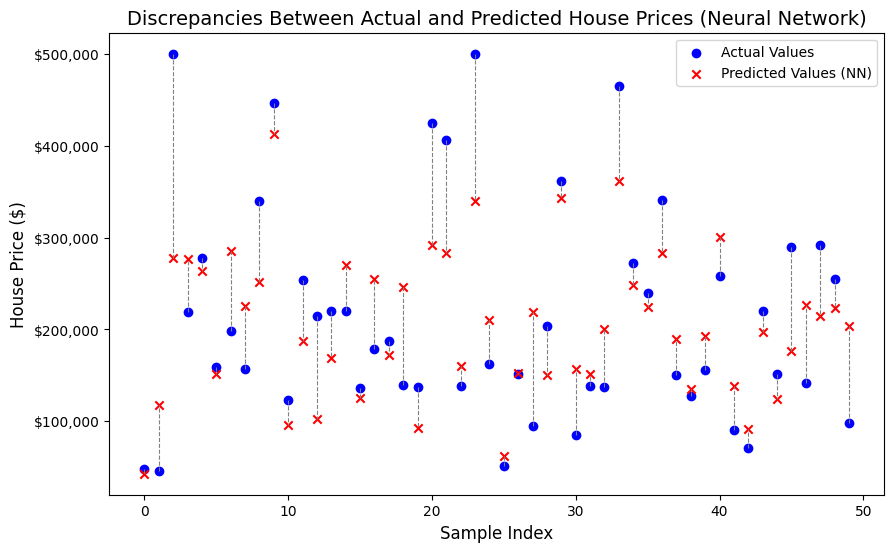

C:\Users\Piotr\AppData\Local\Temp\ipykernel_27052\2579839450.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'${int(tick):,}' for tick in plt.gca().get_yticks()])


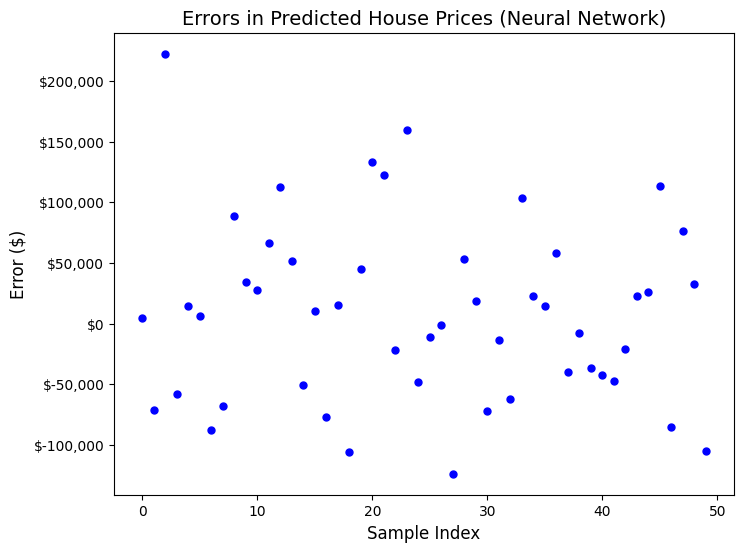

### **TensorFlow** with Neural Networks: Errors

* Mean Absolute Error: **58322.1396875**

* Standard Deviation of Errors: **74206.30991045326**

* Max Error: **222626.8125**

* Mean Error: **8078.27640625**

* Variance of Errors: **5506576430.526234**

In [88]:
import matplotlib.pyplot as plt
import numpy as np

# code is similar to previous cell - see it for comments and explanations

y_pred_nn = nn_model.predict(X_test)

n_samples = 50
y_test_sample = y_test[:n_samples]
y_pred_sample_nn = y_pred_nn[:n_samples].flatten() 

y_test_sample = y_test_sample.reset_index(drop=True)

plt.figure(figsize=(10, 6))
plt.scatter(range(n_samples), y_test_sample, color='blue', label='Actual Values')
plt.scatter(range(n_samples), y_pred_sample_nn, color='red', label='Predicted Values (NN)', marker='x')

for i in range(n_samples):
    plt.plot([i, i], [y_test_sample.iloc[i], y_pred_sample_nn[i]], 'gray', linestyle='--', linewidth=0.8)

plt.title('Discrepancies Between Actual and Predicted House Prices (Neural Network)', fontsize=14)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('House Price ($)', fontsize=12)

plt.gca().set_yticklabels([f'${int(tick):,}' for tick in plt.gca().get_yticks()])

plt.legend()

plt.show()

errors_nn = y_test_sample - y_pred_sample_nn.flatten()


plt.figure(figsize=(8, 6))
plt.plot(errors_nn, marker='o', linestyle='None', color='blue', markersize=5)
plt.title('Errors in Predicted House Prices (Neural Network)', fontsize=14)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Error ($)', fontsize=12)
plt.gca().set_yticklabels([f'${int(tick):,}' for tick in plt.gca().get_yticks()])
plt.show()


display(Markdown("### **TensorFlow** with Neural Networks: Errors"))
display(Markdown(f"* Mean Absolute Error: **{errors_nn.abs().mean()}**"))
display(Markdown(f"* Standard Deviation of Errors: **{errors_nn.std()}**"))
display(Markdown(f"* Max Error: **{errors_nn.max()}**"))
# display(Markdown(f"* Min Error: **{errors_nn.min()}**"))
display(Markdown(f"* Mean Error: **{errors_nn.mean()}**"))
# display(Markdown(f"* Median Error: **{errors_nn.median()}**"))
display(Markdown(f"* Variance of Errors: **{errors_nn.var()}**"))



In [121]:
# comparing the errors of the two models as a table

display(Markdown("### Comparing Errors of the Two Models"))

errors_df = pd.DataFrame({
    'SciKit Learn': errors_skl,
    'Neural Network': errors_nn
})

mean_abs_errors = errors_df.abs().mean()
max_errors = errors_df.abs().max()
mean_errors = errors_df.abs().mean()
std_errors = errors_df.std()
var_errors = errors_df.var()

combined_errors = pd.concat([mean_abs_errors.to_frame(name='Mean Absolute Errors'),
                             max_errors.to_frame(name='Max Errors'),
                             mean_errors.to_frame(name='Mean Errors'),
                             std_errors.to_frame(name='Standard Deviation of Errors'),
                             var_errors.to_frame(name='Variance of Errors')
                             ],

                            axis=1)

# different formatting since variance is squared
formatters = {
    'Mean Absolute Errors': '${:,.2f}',
    'Max Errors': '${:,.2f}',
    'Mean Errors': '${:,.2f}',
    'Standard Deviation of Errors': '${:,.2f}',
    'Variance of Errors': '$&sup2;{:,.2f}'  # indicate that this is squared
}

display(combined_errors.style.format(formatters).set_caption('Error Metrics with Units'))






### Comparing Errors of the Two Models

,Mean Absolute Errors,Max Errors,Mean Errors,Standard Deviation of Errors,Variance of Errors
SciKit Learn,"$65,272.77","$244,306.04","$65,272.77","$82,097.21","$²6,739,952,534.95"
Neural Network,"$58,322.14","$222,626.81","$58,322.14","$74,206.31","$²5,506,576,430.53"


## Conclusion
---
todo: add conclusion